# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**This notebook was AI-generated and has not been fully verified. Researchers should exercise caution when interpreting the code or results.**

## Overview of the Dandiset

This Dandiset contains calcium imaging data from the supplementary motor area (SMA) and primary motor areas (M1) of four rhesus macaques. The animals were either at rest or engaged in an arm reaching task. The study utilized one-photon calcium imaging with miniature microscopes and GCaMP6f expression.

Dandiset link: https://dandiarchive.org/dandiset/001174/0.250331.2218

## Notebook Summary

This notebook will guide you through accessing and exploring the data within Dandiset 001174. We will demonstrate how to load the Dandiset and its assets using the DANDI API, load a specific NWB file, examine its contents, and visualize some of the acquired data, including imaging data and fluorescence traces.

## Required Packages

This notebook requires the following packages to be installed:

- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- seaborn

## Loading the Dandiset and listing assets

We will start by connecting to the DANDI archive and listing some of the assets available in this Dandiset.


In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for better aesthetics in plots
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


## Loading an NWB file

We will now load one of the NWB files from the Dandiset to explore its contents. We will be loading the file located at `sub-F/sub-F_ses-20240213T110430_ophys.nwb`.

The URL for this asset is constructed using the asset ID `193fee16-550e-4a8f-aab8-2383f6d57a03` as follows: `https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/`


In [2]:
# Load the specific NWB file
url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the loaded NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session start time: 2024-02-13 11:04:30.267000+00:00


## Contents of the NWB file

This NWB file contains optical physiology data. Key data interfaces include:

- **acquisition**: Raw calcium imaging data (`OnePhotonSeries`).
- **processing/ophys**: Processed optical physiology data, including fluorescence traces (`Fluorescence/RoiResponseSeries`) and event amplitudes (`EventAmplitude`), and image masks for identified ROIs (`ImageSegmentation/PlaneSegmentation`).

Here is a summary of some of the key data paths within the NWB file:

```
/
├── acquisition/
│   └── OnePhotonSeries/
│       ├── data (Dataset: raw imaging data)
│       └── ...
├── processing/
│   └── ophys/
│       ├── Fluorescence/
│       │   └── RoiResponseSeries/
│       │       ├── data (Dataset: fluorescence traces)
│       │       └── ...
│       ├── EventAmplitude/
│       │   ├── data (Dataset: event amplitudes)
│       │   └── ...
│       └── ImageSegmentation/
│           └── PlaneSegmentation/
│               └── image_mask (VectorData: image masks for ROIs)
│               └── ...
└── ...
```

## Exploring Imaging Data

We can access the raw imaging data from the `acquisition/OnePhotonSeries/data` path. This is a large dataset, so we will only load and visualize a single frame for demonstration.


Imaging data shape: (6026, 1280, 800)
Imaging data dtype: uint16


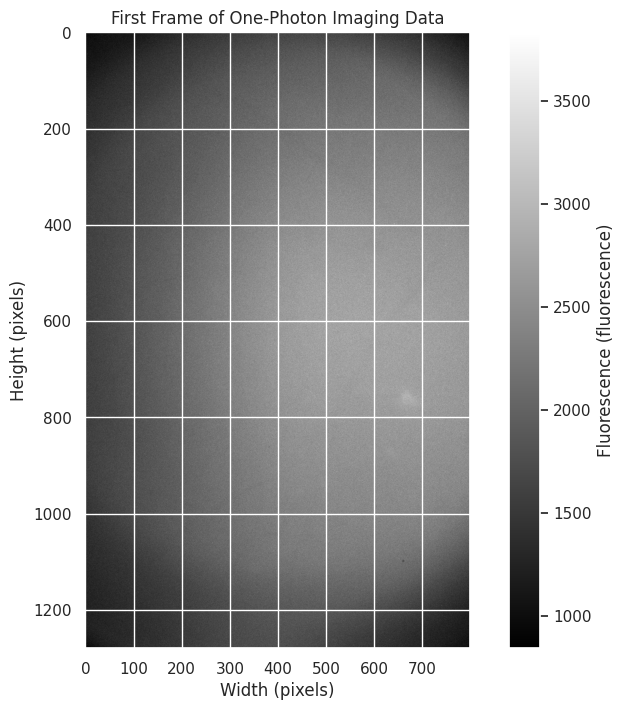

In [3]:
# Access the OnePhotonSeries data
one_photon_series = nwb.acquisition["OnePhotonSeries"]
imaging_data = one_photon_series.data

# Print the shape and data type of the imaging data
print(f"Imaging data shape: {imaging_data.shape}")
print(f"Imaging data dtype: {imaging_data.dtype}")

# Load and display the first frame of the imaging data
# We use [0, :, :] to load only the first frame
first_frame = imaging_data[0, :, :]

plt.figure(figsize=(10, 8))
plt.imshow(first_frame, cmap='gray')
plt.title("First Frame of One-Photon Imaging Data")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.colorbar(label=f"Fluorescence ({one_photon_series.unit})")
plt.show()

## Exploring Fluorescence Traces

The processed fluorescence traces are available under `processing/ophys/Fluorescence/RoiResponseSeries/data`. This dataset contains the fluorescence intensity over time for each identified ROI.


Fluorescence data shape: (6026, 6)
Fluorescence data dtype: float32


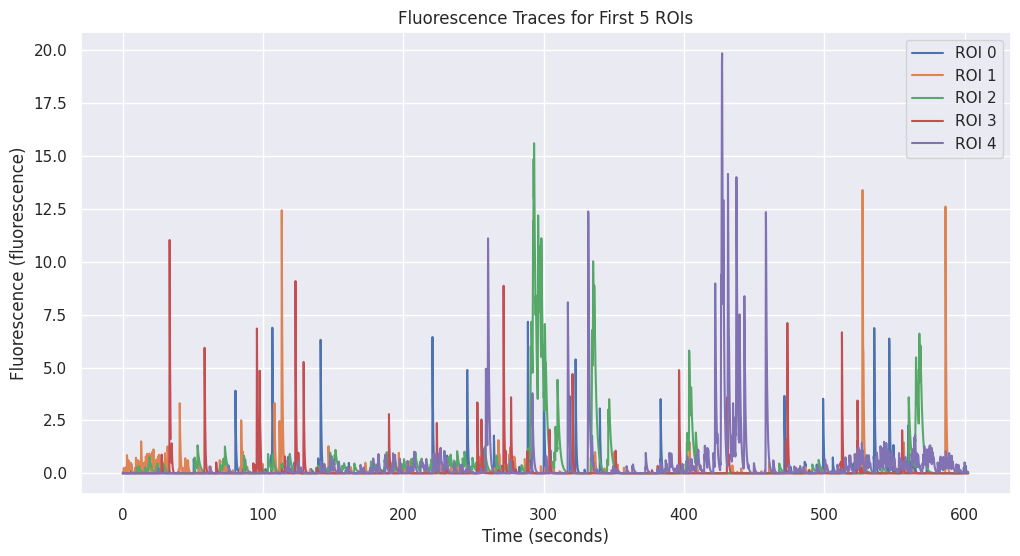

In [4]:
# Access the RoiResponseSeries data
fluorescence_series = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["RoiResponseSeries"]
fluorescence_data = fluorescence_series.data

# Print the shape and data type of the fluorescence data
print(f"Fluorescence data shape: {fluorescence_data.shape}")
print(f"Fluorescence data dtype: {fluorescence_data.dtype}")

# Get the timestamps for the fluorescence data
# We load only a subset of timestamps corresponding to the subset of data we visualize
timestamps = fluorescence_series.starting_time + np.arange(fluorescence_data.shape[0]) / fluorescence_series.rate

# Plot the fluorescence traces for the first few ROIs
num_rois_to_plot = min(5, fluorescence_data.shape[1]) # Plot up to 5 ROIs

plt.figure(figsize=(12, 6))
for i in range(num_rois_to_plot):
    # Load data for a single ROI across all timepoints
    roi_trace = fluorescence_data[:, i]
    plt.plot(timestamps, roi_trace, label=f"ROI {i}")

plt.title(f"Fluorescence Traces for First {num_rois_to_plot} ROIs")
plt.xlabel(f"Time ({fluorescence_series.starting_time_unit})")
plt.ylabel(f"Fluorescence ({fluorescence_series.unit})")
plt.legend()
plt.show()

## Exploring ROI Image Masks

The image masks for the identified ROIs are stored under `processing/ophys/ImageSegmentation/PlaneSegmentation/image_mask`. These masks indicate the spatial extent of each detected cell.


In [5]:
# Access the PlaneSegmentation data and image masks
plane_segmentation = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
image_masks = plane_segmentation.image_mask

# Print information about the image masks
print(f"Number of image masks: {len(image_masks)}")
# Note: Accessing the shape directly on image_masks might not work as expected
# We can get the shape of an individual mask if needed, but the structure is a list of masks.

# Visualize the image masks
# We will create a composite image by taking the maximum value at each pixel across all masks.
# This helps to see the location of all ROIs.

# Get the dimensions of the imaging plane from the OnePhotonSeries data
image_height, image_width = imaging_data.shape[1], imaging_data.shape[2]

# Create an empty array to hold the composite image
composite_mask = np.zeros((image_height, image_width), dtype=np.float32)

# Iterate through the image masks and add them to the composite image using maximum projection
# Ensure masks are processed correctly, handling potential variations in how mask data is stored.
# Here we assume image_masks is iterable and each item has 'x', 'y', and 'valid_data' properties.
# If not, adaptation based on the actual structure of 'image_mask' from the nwb file is needed.
# Based on the nwb-file-info output, image_mask is VectorData, which often means it's stored in a structured format.
# We might need to convert to a DataFrame or access data differently depending on the pynwb implementation.
# Let's try accessing the data directly if it's an array-like structure.
# A safer way might be to iterate over the rows of the PlaneSegmentation table if `image_mask` is a column.

# Let's try accessing the data through the to_dataframe()
try:
    mask_dataframe = plane_segmentation.to_dataframe()

    if 'image_mask' in mask_dataframe.columns:
        print("Processing image masks from DataFrame.")
        for index, row in mask_dataframe.iterrows():
            mask_data = row['image_mask']
            # mask_data is expected to be a list of lists/tuples, e.g., [[y1, x1, val1], [y2, x2, val2], ...]
            for y, x, val in mask_data:
                # Add the value to the composite mask using max projection
                # Ensure coordinates are within bounds
                if 0 <= y < image_height and 0 <= x < image_width:
                    composite_mask[y, x] = max(composite_mask[y, x], val)
    else:
        print("Could not find 'image_mask' column in PlaneSegmentation dataframe.")
        # Fallback or alternative approach if dataframe method fails or column is missing
        # This section can be removed if the dataframe approach is confirmed to work
        print("Attempting alternative access to image masks (might require NWB structure knowledge):")
        if hasattr(plane_segmentation, 'image_masks') and isinstance(plane_segmentation.image_masks, list):
             print("Processing image masks from plane_segmentation.image_masks list.")
             for mask in plane_segmentation.image_masks:
                 # Need to understand the structure of individual mask objects
                 # Assuming each mask object has a 'data' attribute that's a numpy array
                 if hasattr(mask, 'data') and isinstance(mask.data, np.ndarray):
                     # Assuming mask.data is a 2D array matching imaging plane dimensions
                     if mask.data.shape == (image_height, image_width):
                         composite_mask = np.maximum(composite_mask, mask.data)
                     else:
                         print(f"Warning: Mask shape {mask.data.shape} does not match imaging plane {image_height, image_width}.")
                 else:
                     print("Warning: Could not access expected 'data' attribute from mask object.")
        else:
             print("Could not find a recognizable structure for image masks.")


except Exception as e:
    print(f"An error occurred while processing image masks: {e}")
    print("Skipping image mask visualization.")
    composite_mask = None # Set composite_mask to None to skip plotting

if composite_mask is not None and np.max(composite_mask) > 0:
    plt.figure(figsize=(10, 8))
    plt.imshow(composite_mask, cmap='hot', vmin=0, vmax=np.max(composite_mask)) # Use 'hot' cmap for masks
    plt.title("Composite Image of ROI Masks (Maximum Projection)")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.colorbar(label="Mask Value")
    plt.show()
else:
    print("No composite mask generated or max value is zero. Skipping visualization.")

Number of image masks: 6


Processing image masks from DataFrame.
An error occurred while processing image masks: too many values to unpack (expected 3)
Skipping image mask visualization.
No composite mask generated or max value is zero. Skipping visualization.


## Linking to Neurosift

You can explore this NWB file interactively on Neurosift using the following link:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=0.250331.2218

## Summary and Future Directions

This notebook has provided a basic introduction to accessing and exploring the data within Dandiset 001174. We have demonstrated how to connect to the DANDI archive, load an NWB file, examine key data streams like raw imaging data, fluorescence traces, and ROI masks, and visualize some of this data.

Potential future directions for analysis could include:

- Analyzing the fluorescence traces for neural activity patterns.
- Correlating neural activity with behavioral data if available in other files in the Dandiset.
- Using the image masks to extract more detailed information about ROI morphology.
- Exploring other NWB files within the Dandiset to examine data from different sessions or subjects.
- Investigating the relationship between activity in SMA and M1.

This notebook serves as a starting point. Researchers are encouraged to delve deeper into the data and explore the rich information contained within this Dandiset.